# 🌎 **Air Quality Prediction** 

## **Project Overview**
This notebook explores **Air Quality Index (AQI)** prediction across different states in the US. Using machine learning models like **Linear Regression**, we aim to predict AQI based on historical pollutant data.
---
## **📊 Data Overview**
The dataset contains:
- **Particle Concentration Levels**: PM2.5, PM10, NO2, O3, CO
- **Location**: State and Population
---
## **📈 Results and Evaluation**
Key evaluation metrics:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R-Squared (R²)**
We'll also visualize **predicted vs. actual AQI values** to gauge model performance.
---


In [36]:
# Data Cleaning
import pandas as pd 
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split Data for Models
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics

# statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot


In [9]:
df = pd.read_csv('../Processed_Data/AQI_Population_Ratings.csv')

In [10]:
df.describe()

,Year,Ozone Average,Carbon Average,Nitrogen Average,Sulfur Average,PM2.5 Average,PM10 Average,Ozone AQI,Carbon AQI,Nitrogen AQI,Sulfur AQI,PM2.5 AQI,PM10 AQI,Overall AQI,Population
count,1303.000000,1303.0,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.0,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1200.000000
mean,2011.454336,0.0,0.384037,13.349194,4.270913,4.173983,15.601381,0.0,4.294705,12.529547,5.918649,22.132771,14.136608,32.553338,6211.399853
std,6.935684,0.0,0.334278,7.421277,4.483574,4.535139,12.760488,0.0,3.765070,7.007491,6.309928,23.036271,11.325775,15.155519,6883.723650
min,2000.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,494.300000
25%,2005.000000,0.0,0.200000,9.000000,1.000000,0.000000,0.000000,0.0,2.000000,8.000000,1.000000,0.000000,0.000000,20.000000,1805.818250
50%,2011.000000,0.0,0.300000,13.000000,3.000000,3.400000,17.300000,0.0,3.000000,12.000000,4.000000,19.000000,16.000000,31.000000,4411.949000
75%,2017.000000,0.0,0.500000,18.000000,6.000000,8.100000,22.700000,0.0,6.000000,17.000000,8.000000,45.000000,21.000000,45.500000,7172.136000
max,2023.000000,0.0,8.800000,37.000000,43.000000,32.200000,123.900000,0.0,94.000000,35.000000,59.000000,94.000000,85.000000,94.000000,39503.200000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1303 non-null   int64  
 1   State Name        1303 non-null   object 
 2   Ozone Average     1303 non-null   int64  
 3   Carbon Average    1303 non-null   float64
 4   Nitrogen Average  1303 non-null   int64  
 5   Sulfur Average    1303 non-null   int64  
 6   PM2.5 Average     1303 non-null   float64
 7   PM10 Average      1303 non-null   float64
 8   Ozone AQI         1303 non-null   int64  
 9   Carbon AQI        1303 non-null   int64  
 10  Nitrogen AQI      1303 non-null   int64  
 11  Sulfur AQI        1303 non-null   int64  
 12  PM2.5 AQI         1303 non-null   int64  
 13  PM10 AQI          1303 non-null   int64  
 14  Overall AQI       1303 non-null   int64  
 15  Population        1200 non-null   float64
dtypes: float64(4), int64(11), object(1)
memory

In [20]:
df.isnull().sum()

Year                  0
State Name            0
Ozone Average         0
Carbon Average        0
Nitrogen Average      0
Sulfur Average        0
PM2.5 Average         0
PM10 Average          0
Ozone AQI             0
Carbon AQI            0
Nitrogen AQI          0
Sulfur AQI            0
PM2.5 AQI             0
PM10 AQI              0
Overall AQI           0
Population          103
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

Year                0
State Name          0
Ozone Average       0
Carbon Average      0
Nitrogen Average    0
Sulfur Average      0
PM2.5 Average       0
PM10 Average        0
Ozone AQI           0
Carbon AQI          0
Nitrogen AQI        0
Sulfur AQI          0
PM2.5 AQI           0
PM10 AQI            0
Overall AQI         0
Population          0
dtype: int64

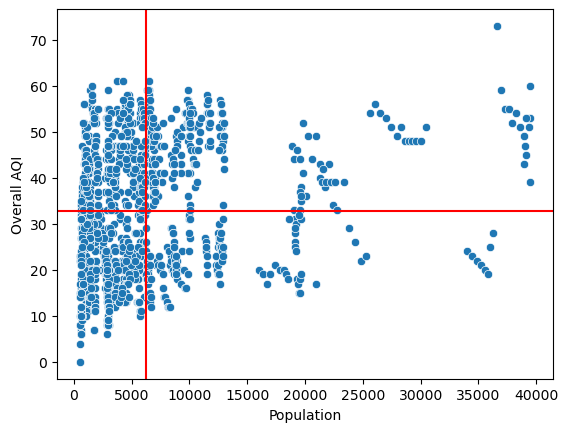

In [42]:
ax = sns.scatterplot(df, x='Population', y='Overall AQI')
ax.axvline(x=df['Population'].mean(), color='red',  label='Mean Population')
ax.axhline(y=df['Overall AQI'].mean(), color='red',  label='Mean Overall AQI')

c:\Users\arnan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arnan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


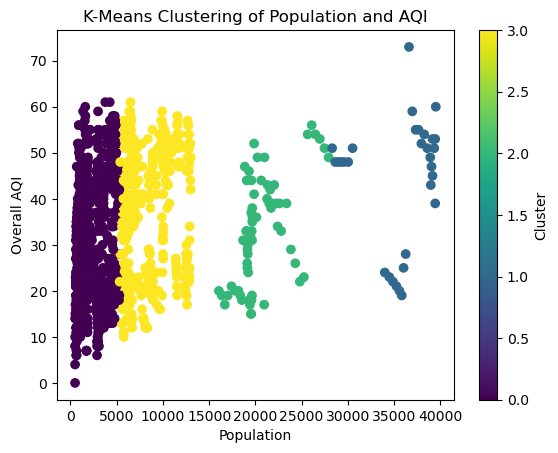

In [45]:
X = df[['Population','Overall AQI']]

kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)


plt.scatter(df['Population'], df['Overall AQI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Population')
plt.ylabel('Overall AQI')
plt.title('K-Means Clustering of Population and AQI')
plt.colorbar(label='Cluster')
plt.show()

In [39]:
X = df[['Population']]
y = df['Overall AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=5000, random_state=42)  
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 11.141187500000001
